# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
df = pd.read_csv('/content/superstore_retail_orders (1).csv')

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [4]:
#data preparation
df_clean = df.dropna()
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          55500 non-null  int64   
 1   order_date        55500 non-null  category
 2   order_year_month  55500 non-null  category
 3   customer_name     55500 non-null  category
 4   city              55500 non-null  category
 5   state_province    55500 non-null  category
 6   quantity          55500 non-null  float64 
 7   product_name      55500 non-null  category
 8   product_line      55500 non-null  category
 9   product_price     55500 non-null  float64 
dtypes: category(7), float64(2), int64(1)
memory usage: 3.3 MB


In [5]:
#outlier check and cleanup
from scipy import stats
z_scores = stats.zscore(df_clean.select_dtypes(include=['int', 'float']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df_clean[filtered_entries]

In [6]:
#impute values

df_clean['total_amount'] = df_clean['quantity'] * df_clean['product_price']
df_clean['city'] = df_clean['city'].fillna("n/a")
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54172 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          54172 non-null  int64   
 1   order_date        54172 non-null  category
 2   order_year_month  54172 non-null  category
 3   customer_name     54172 non-null  category
 4   city              54172 non-null  category
 5   state_province    54172 non-null  category
 6   quantity          54172 non-null  float64 
 7   product_name      54172 non-null  category
 8   product_line      54172 non-null  category
 9   product_price     54172 non-null  float64 
 10  total_amount      54172 non-null  float64 
dtypes: category(7), float64(3), int64(1)
memory usage: 3.7 MB
None
           order_id      quantity  product_price  total_amount
count  54172.000000  54172.000000   54172.000000  5.417200e+04
mean   61642.049103      1.516134     614.104032  7.635611e+02
std     75

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [7]:
#create variable
df['complete_customer_info'] = ((df['order_id'].notnull()) &
                                      (df['order_date'].notnull()) &
                                      (df['order_year_month'].notnull()) &
                                      (df['customer_name'].notnull()) &
                                      (df['city'].notnull()) &
                                      (df['state_province'].notnull()) &
                                      (df['order_id'] != '') &
                                      (df['order_date'] != '') &
                                      (df['order_year_month'] != '') &
                                      (df['customer_name'] != '') &
                                      (df['city'] != '') &
                                      (df['state_province'] != '')).astype(int)

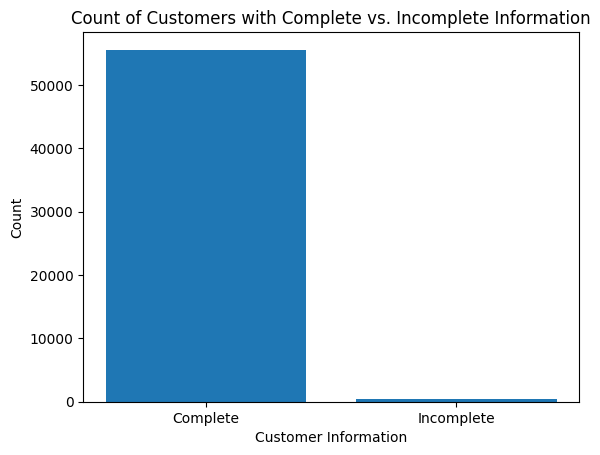

In [8]:
#create chart
customer_info_counts = df['complete_customer_info'].value_counts()
plt.bar(customer_info_counts.index.map({1: 'Complete', 0: 'Incomplete'}), customer_info_counts.values)
plt.xlabel('Customer Information')
plt.ylabel('Count')
plt.title('Count of Customers with Complete vs. Incomplete Information')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

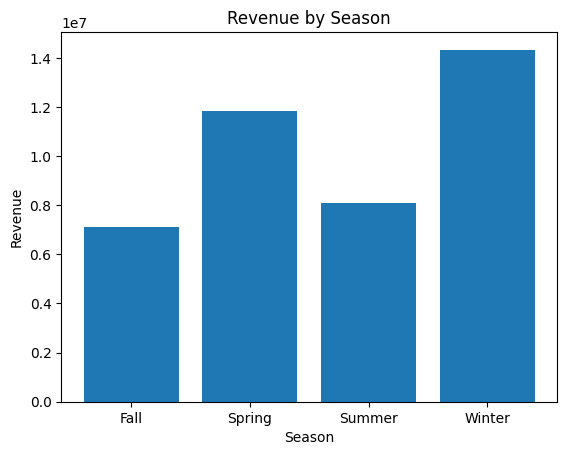

In [11]:
#seasonality
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_clean['season'] = df_clean['order_date'].dt.month.apply(get_season)
revenue_by_season = df_clean.groupby('season')['total_amount'].sum().sort_index()
plt.bar(revenue_by_season.index, revenue_by_season.values)
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Revenue by Season')
plt.show()


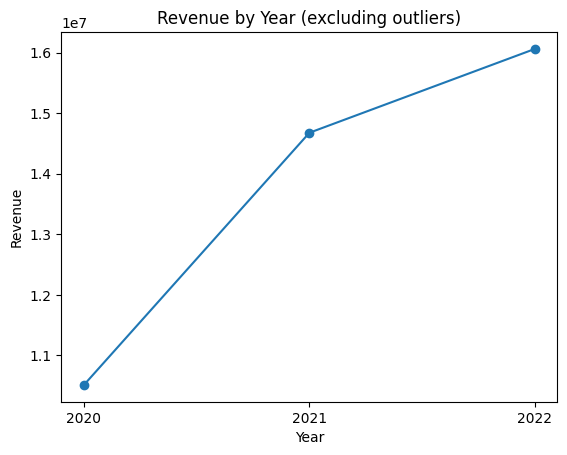

In [16]:
#revenue over time
df_clean_filtered = df_clean[(df_clean['order_year'] != 1922) & (df_clean['order_year'] != 2029)]

revenue_by_year = df_clean_filtered.groupby('order_year')['total_amount'].sum()

plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year (excluding outliers)')
plt.xticks(revenue_by_year.index)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

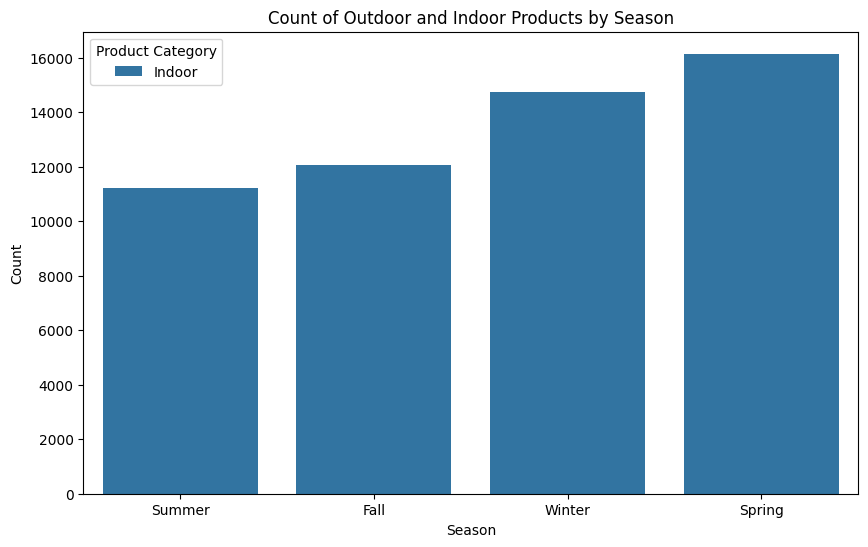

In [17]:
#indoor/outdoor variable
df_clean['product_category'] = df_clean['product_line'].apply(lambda x: 'Outdoor' if 'outdoor' in x.lower() else 'Indoor')

plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='product_category', data=df_clean)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Outdoor and Indoor Products by Season')
plt.legend(title='Product Category')
plt.show()